In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

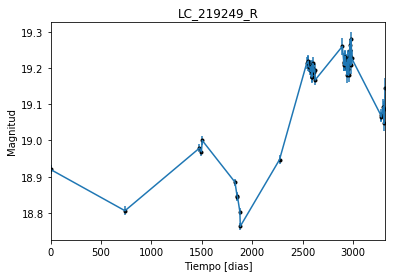

In [2]:
data = np.genfromtxt('LC_219249_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_219249_R')
plt.savefig("LC_219249_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

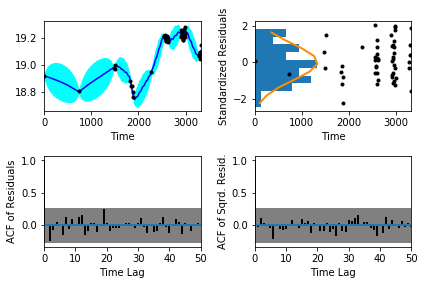

In [5]:
sample.assess_fit()

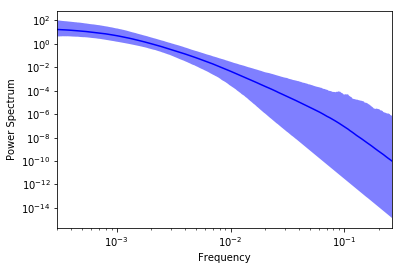

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

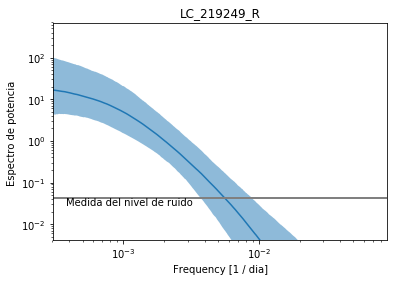

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_219249_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_219249_R')

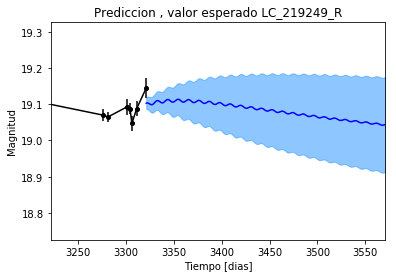

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_219249_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_219249_R')

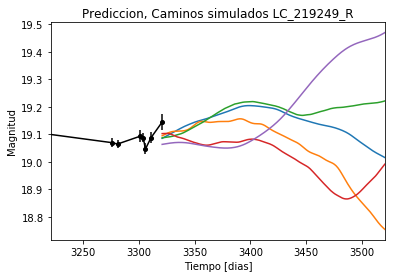

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_219249_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


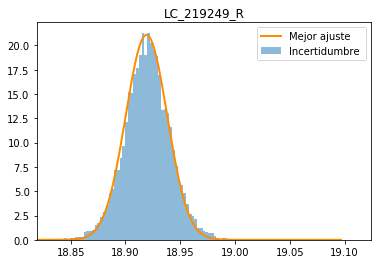

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_219249_R')
plt.savefig("Mejor_ajuste_LC_219249_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_219249_R')

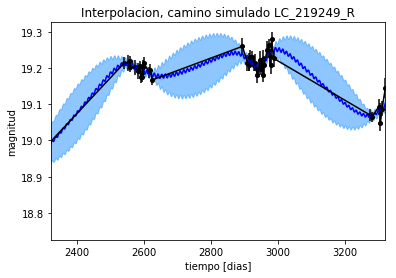

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_219249_R')

Text(0.5,1,'Interpolacion, camino simulado  LC_219249_R')

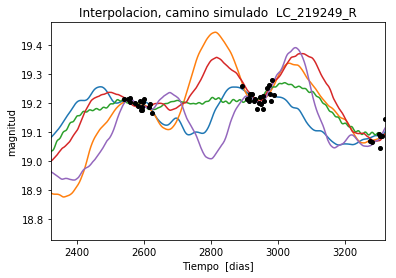

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_219249_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 686.59131745
Median: 0.0112235940734
Standard deviation: 0.111703782446
68% credibility interval: [ 0.00107038  0.14164049]
95% credibility interval: [  3.55343662e-04   4.16676284e-01]
99% credibility interval: [  3.10166091e-04   4.96501112e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 951.832681838
Median: 0.0018156899809
Standard deviation: 0.0410974030037
68% credibility interval: [ 0.00046186  0.0181766 ]
95% credibility interval: [ 0.00031961  0.12564105]
99% credibility interval: [ 0.00030659  0.30244534]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 719.651536138
Median: 0.00947729332832
Standard deviation: 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 690.094632321
Median: 129.45142719
Standard deviation: 1.71657514496
68% credibility interval: [ 127.47694627  130.71176823]
95% credibility interval: [ 124.94177348  131.40416793]
99% credibility interval: [ 122.96835318  131.6944311 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 563.437372667
Median: 0.509931966558
Standard deviation: 1.10453808261
68% credibility interval: [ 0.05385683  2.24684405]
95% credibility interval: [ 0.01675428  3.63703322]
99% credibility interval: [ 0.01065822  4.79278526]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 467.113316347
Median: 0.192068283617
Standard deviation: 2.03705446204
68% credibility interval: [ 0.01261674  1.7388893 ]
95% credibility interval: [  1.20075479e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20019.0033038
Median: 1.77768536854e-18
Standard deviation: 5.51542122426e+75
68% credibility interval: [  3.19434454e-52   5.61985037e-02]
95% credibility interval: [  1.11286406e-91   2.92091478e+19]
99% credibility interval: [  2.75838810e-102   7.98622964e+073]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1524.95320064
Median: 18.9918949968
Standard deviation: 0.0952831456608
68% credibility interval: [ 18.90978971  19.07211124]
95% credibility interval: [ 18.80435142  19.18851791]
99% credibility interval: [ 18.69871269  19.29276205]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 619.355188097
Median: 0.00199703129087
Standard deviation: 0.11604102371
68% credibility interval: [ 0.          0.15129282]
95% credibility interval: [ 0.          0.43392956]
99% credibility interval: [ 0.          0.50234568]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 619.355188097
Median: 0.00199703129087
Standard deviation: 0.11604102371
68% credibility interval: [ 0.          0.15129282]
95% credibility interval: [ 0.          0.43392956]
99% credibility interval: [ 0.          0.50234568]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2040.18429641
Median: 0.0
Standard deviation: 0.000299090572215
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 690.094632321
Median: 129.45142719
Standard deviation: 1.71657514496
68% credibility interval: [ 127.47694627  130.71176823]
95% credibility interval: [ 124.94177348  131.40416793]
99% credibility interval: [ 122.96835318  131.6944311 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1354.31494016
Median: 0.0341259195888
Standard deviation: 0.0407300147847
68% credibility interval: [ 0.01997656  0.06753029]
95% credibility interval: [ 0.01261098  0.15606849]
99% credibility interval: [ 0.01011689  0.25684751]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1811.94292707
Median: 1.06393077714
Standard deviation: 0.175208105766
68% credibility interval: [ 0.91237771  1.25096063]
95% credibility interval: [ 0.79033496  1.47507244]
99% credibility interval: [ 0.72288845  1.64718981]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 665.438656186
Median: 5.07811856561e-05
Standard deviation: 0.00175958577758
68% credibility interval: [  1.23951316e-06   6.10509078e-04]
95% credibility interval: [  6.96347772e-24   3.85599501e-03]
99% credibility interval: [  7.37070153e-79   1.43363894e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 686.59131745
Median: (-0.070519921376-1.24278151007j)
Standard deviation: 1.01202698738
68% credibility interval: [-0.88995344-2.53871089j -0.00672542-0.30511569j]
95% credibility interval: [ -2.61805431e+00+0.j          -2.23269008e-03-1.19088587j]
99% credibility interval: [ -3.11960849e+00+0.j          -1.94883102e-03-0.01450142j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 951.832681838
Median: (-0.0114083166104+0.55703290389j)
Standard deviation: 0.77348322547
68% credibility interval: [-0.11420694+0.j -0.00290195+0.j]
95% credibility interval: [-0.78942603+3.19063618j -0.00200817+0.j        ]
99% credibility interval: [-1.90032011+3.19484016j -0.00192638+0.j        ]
Posterior summary for parameter ar_roots  